In [1]:
import jax.numpy as np
import numpy as np
import matplotlib.pyplot as plt

import jax.numpy as jnp

import lineax
import jax
import optax
import optimistix

from make_pulse_and_trace import MakePulse, apply_noise

from utilities import MyNamespace

In [4]:
pulse_maker=MakePulse(N=128*10, Deltaf=4) # Deltaf should be 3 for thg and 2 for shg -> depends on central_f is guess, currently 0.5
# ifrog -> Deltaf controls temporal resolution and needs to be sufficiently large 


pulse_maker.multi_pulse_time_domain_length_multiplier=8
pulse_maker.multi_pulse_parameters=[[50, 50], [5, 5, 5], [0.5, 0.25, 0.25], [1, 1, 1], ["flat", "flat", "flat"], [None, None, None]] 

time_inp, pulse_t_inp, frequency_inp, pulse_f_inp=pulse_maker.generate_pulse_t(spectral_amp_parameters=[0.3, 0.1], type="polynomial", parameters_phase=[1/4,0,0,1500,0], 
                                                                               multi_pulse_parameters=None)#pulse_maker.multi_pulse_parameters)

input_pulses=pulse_maker.input_pulses





time_gate, pulse_t_gate, frequency_gate, pulse_f_gate=pulse_maker.generate_pulse_t(spectral_amp_parameters=[0.41,0.01], type="polynomial", parameters_phase=[3/4,0,0,0], 
                                                                                   multi_pulse_parameters=None)

input_pulses_gate=pulse_maker.input_pulses

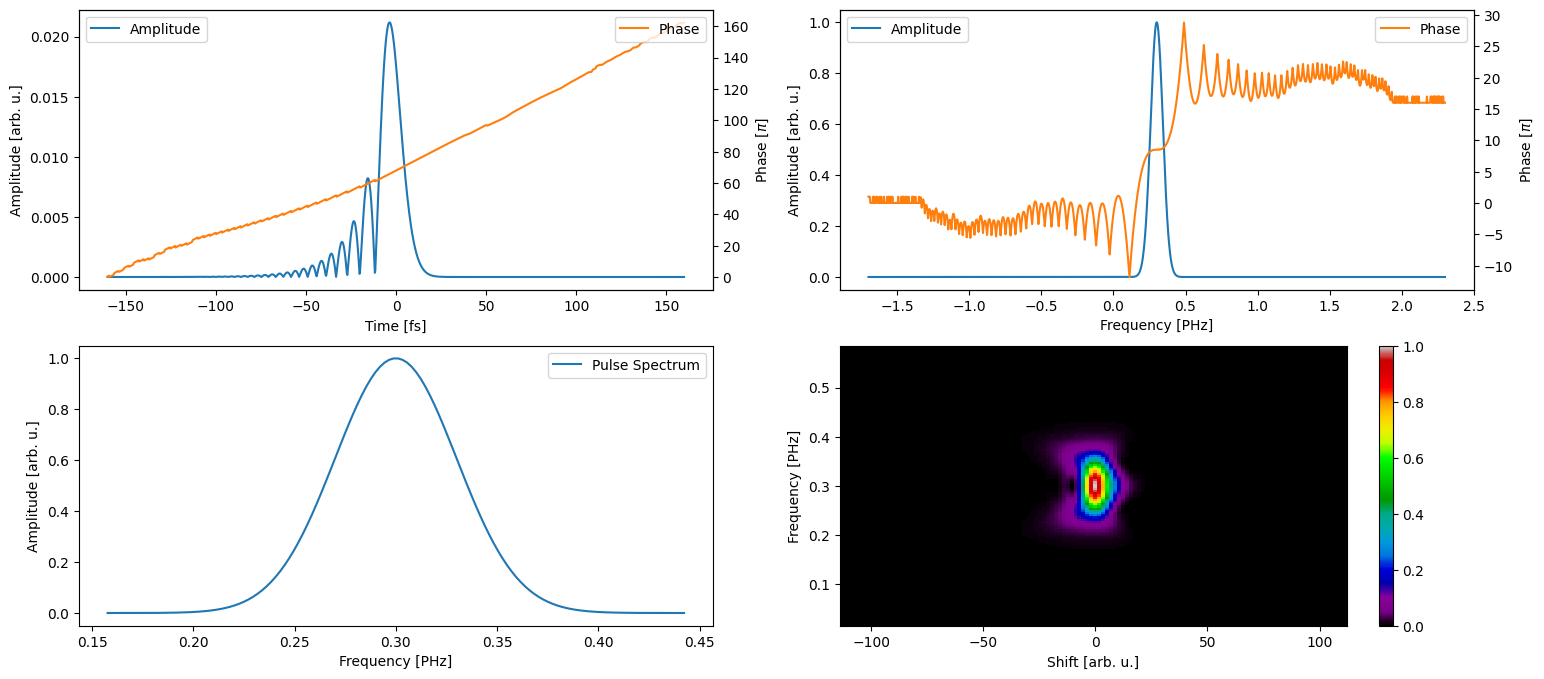

In [3]:
time, frequency, trace, spectra=pulse_maker.generate_frog_trace_and_spectrum(time_inp, frequency_inp, pulse_t_inp, pulse_f_inp, nonlinear_method="pg", 
                                                                                                  scale_time_range=5, N=128, xfrog=False, 
                                                                                                  gate=(frequency_gate, pulse_f_gate),
                                                                                                  interpolate_fft_conform=True, cut_off_val=1e-2,
                                                                                                  ifrog=False)#, frequency_range=(0,1))

#trace = apply_noise(trace, scale_val=(0.05, 0.05), additive_noise=True, multiplicative_noise=True)

/home/tillstehling/miniconda3/lib/python3.11/site-packages/refractiveindex/refractiveindex.py:300: RuntimeWarning: invalid value encountered in sqrt
  n = np.sqrt(nsq)


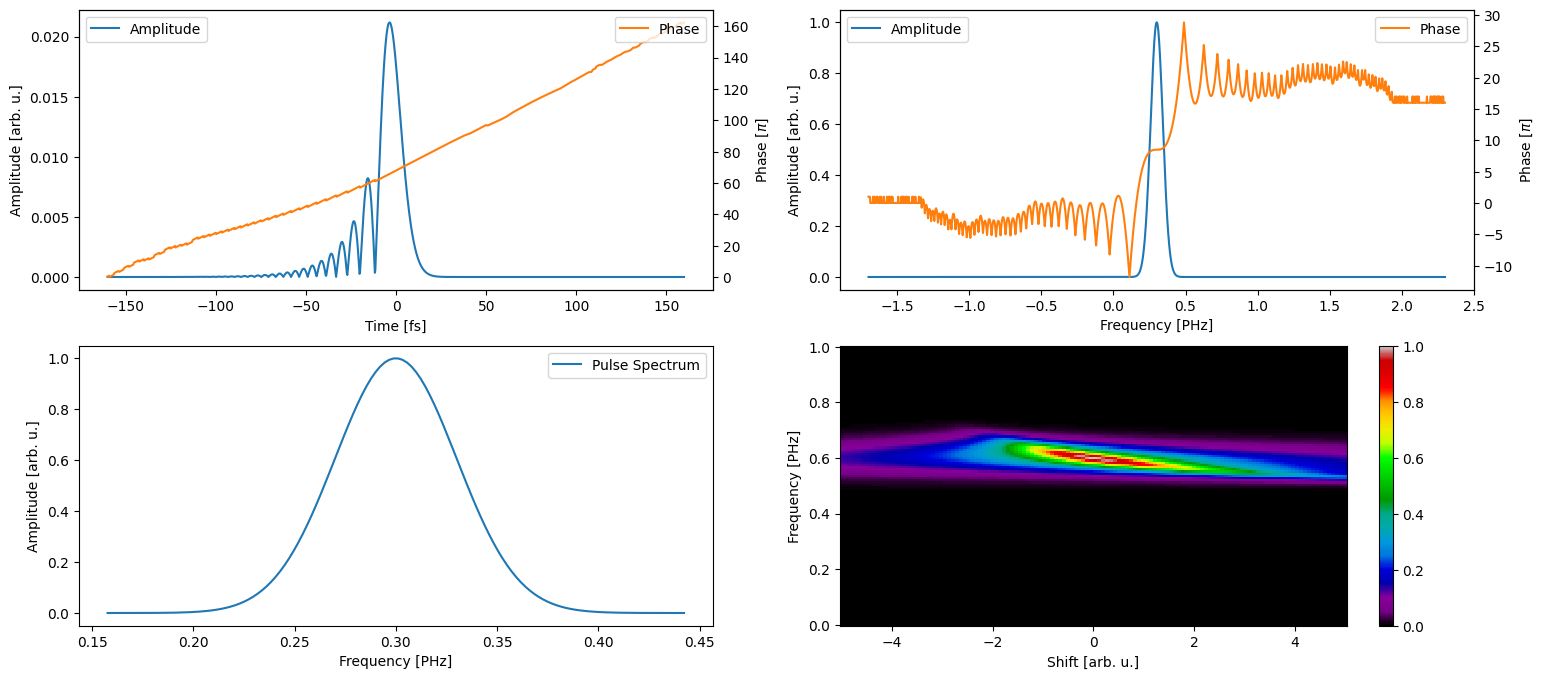

In [5]:
z_arr=np.linspace(-5, 5, 128)
#pulse_t, pulse_f=pulse_maker.precompensate_pulse_for_dscan(time, frequency, pulse_t, GDD=-5000, TOD=0, central_f=0.5)
z_arr, frequency, trace, spectra = pulse_maker.generate_dscan_trace_and_spectrum(z_arr, time_inp, frequency_inp, pulse_t_inp, pulse_f_inp,
                                                                                                   nonlinear_method="shg", 
                                                                                                   N=128, cut_off_val=1e-3, frequency_range=(0,1))


#trace = apply_noise(trace, scale_val=0.01, additive_noise=True, multiplicative_noise=False)

# if there are weird stripes in the trace -> set Deltaf=2 somehow thats needed

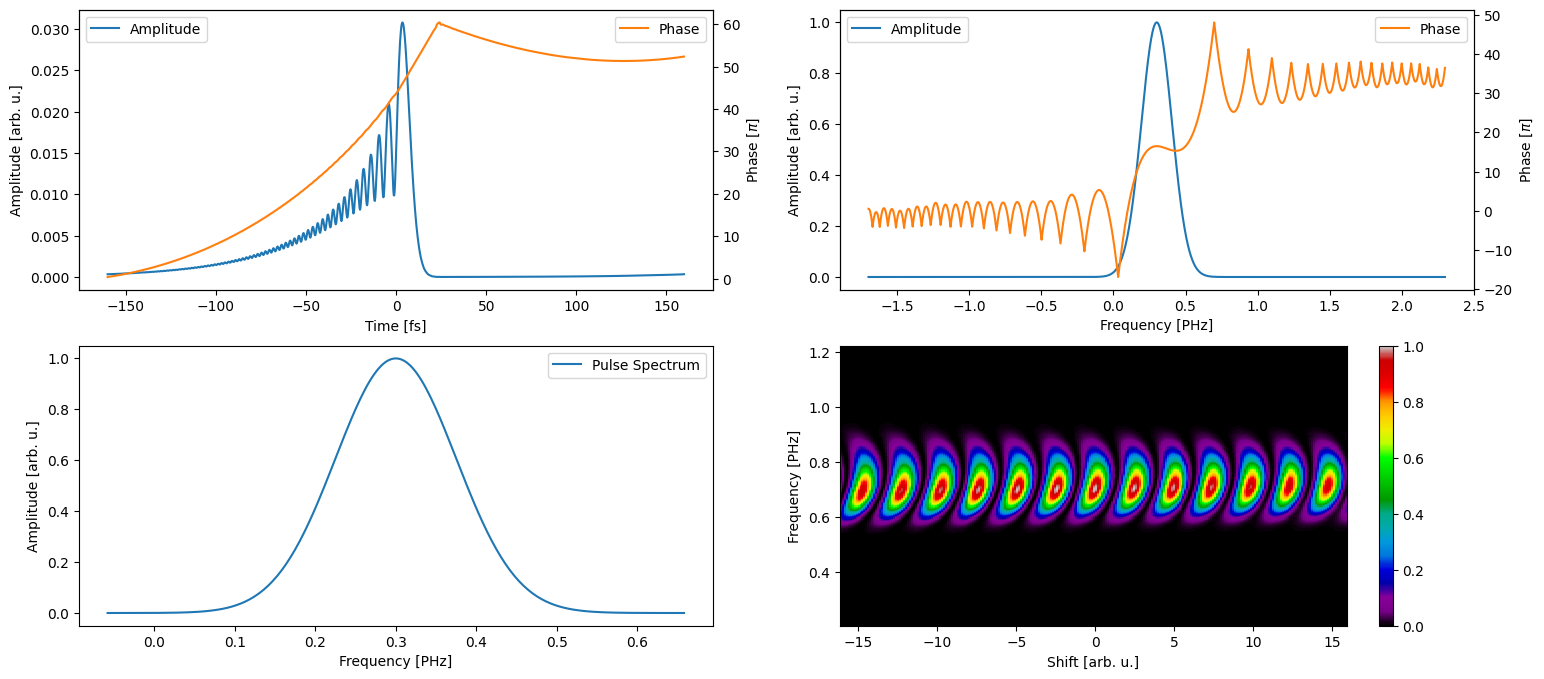

In [29]:
time_inp, pulse_t_inp, frequency_inp, pulse_f_inp=pulse_maker.generate_pulse_t(spectral_amp_parameters=[0.3, 0.25], type="polynomial", parameters_phase=[1/4,0,-100,500,0], 
                                                                               multi_pulse_parameters=None)#pulse_maker.multi_pulse_parameters)

_, _, frequency_gate_1, pulse_f_gate_1=pulse_maker.generate_pulse_t(spectral_amp_parameters=[0.4,0.01], type="polynomial", parameters_phase=[3/4,0,0,0], 
                                                                                   multi_pulse_parameters=None)
_, _, frequency_gate_2, pulse_f_gate_2=pulse_maker.generate_pulse_t(spectral_amp_parameters=[0.41,0.01], type="polynomial", parameters_phase=[3/4,0,0,0], 
                                                                                   multi_pulse_parameters=None)

time, frequency, trace, spectra=pulse_maker.generate_2dsi_trace_and_spectrum(time_inp, frequency_inp, pulse_t_inp, pulse_f_inp, "shg", 
                                                                             anc=((frequency_gate_1, pulse_f_gate_1),
                                                                                  (frequency_gate_2, pulse_f_gate_2)), 
                                                                             N=256, scale_time_range=0.1, plot_stuff=True, cut_off_val=0.001, frequency_range=None)

In [4]:
from classic_algorithms_frog import Vanilla, LSGPA, GeneralizedProjection, TimeDomainPtychography, COPRA

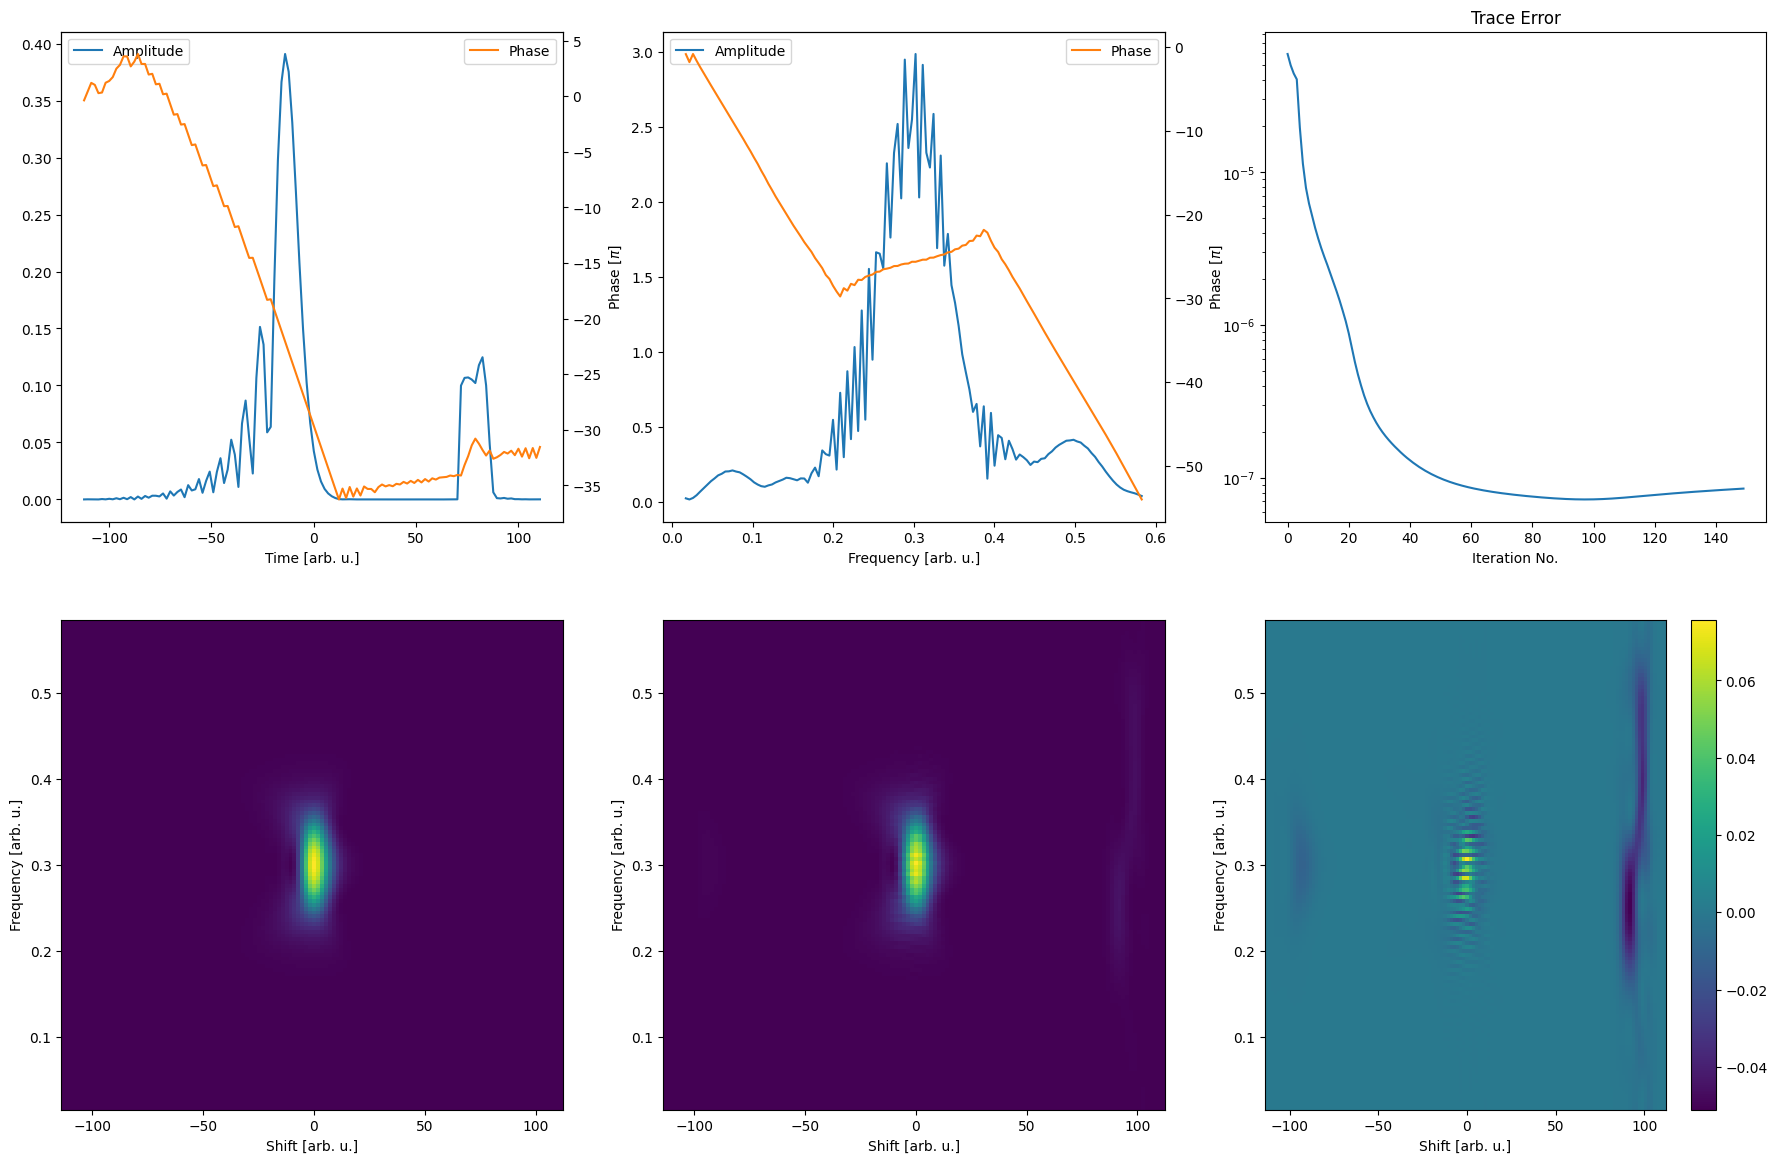

In [ ]:
# vanilla = Vanilla(time, frequency, trace, "pg")
# population = vanilla.create_initial_population(population_size=3, guess_type="random")

# final_result = vanilla.run(population, 100)
# vanilla.plot_results(final_result)






# lsgpa = LSGPA(time, frequency, trace, "pg", xfrog=False)#.use_measured_spectrum(spectra.pulse[0], spectra.pulse[1], "pulse")
# population = lsgpa.create_initial_population(population_size=3, guess_type="random")

# final_result = lsgpa.run(population, 500)
# lsgpa.plot_results(final_result)






# gp = GeneralizedProjection(time, frequency, trace, "pg", xfrog=False)
# population = gp.create_initial_population(population_size=1, guess_type="random")

# gp.global_hessian = "lbfgs"
# gp.conjugate_gradients = False


# gp.no_steps_descent = 25
# gp.max_steps_linesearch = 15
# gp.use_linesearch = "zoom"
# gp.global_gamma = 1.0
# gp.delta_gamma = 2.0
# gp.c1 = 1e-4
# gp.c2 = 0.5

# # gp.lbfgs_memory = 3

# # gp.use_copra_style_step_scaling = False


# final_result = gp.run(population, 150)
# gp.plot_results(final_result)






# tdp = TimeDomainPtychography(time, frequency, trace, "sd", "ePIE", xfrog="doubleblind")
# population = tdp.create_initial_population(population_size=3, guess_type="random")

# tdp.alpha = 0.1
# tdp.local_gamma = 0.1
# tdp.global_gamma = 0.1

# tdp.lbfgs_memory = 15
# tdp.conjugate_gradients = False#"fletcher_reeves"

# tdp.global_hessian = "full" #"lbfgs"
# tdp.use_linesearch = "backtracking" #"wolfe"
# #tdp.lambda_lm = 1e-2

# final_result = tdp.run(population, 0, 150)
# tdp.plot_results(final_result)





# copra = COPRA(time, frequency, trace, "pg", ifrog=False)#, xfrog="doubleblind")
# population = copra.create_initial_population(population_size=5, guess_type="random")

# # copra.use_linesearch = False #"wolfe"

# # copra.local_gamma=1
# # copra.global_gamma=0.5
# # copra.local_adaptive_scaling = "original"
# # copra.global_adaptive_scaling = "original"
# # copra.xi=1e-12

# # copra.local_hessian=False
# # copra.global_hessian=False#"full"

# final_result = copra.run(population, 150, 100)
# copra.plot_results(final_result)



In [4]:
from classic_algorithms_dscan import Basic, GeneralizedProjection, TimeDomainPtychography, COPRA

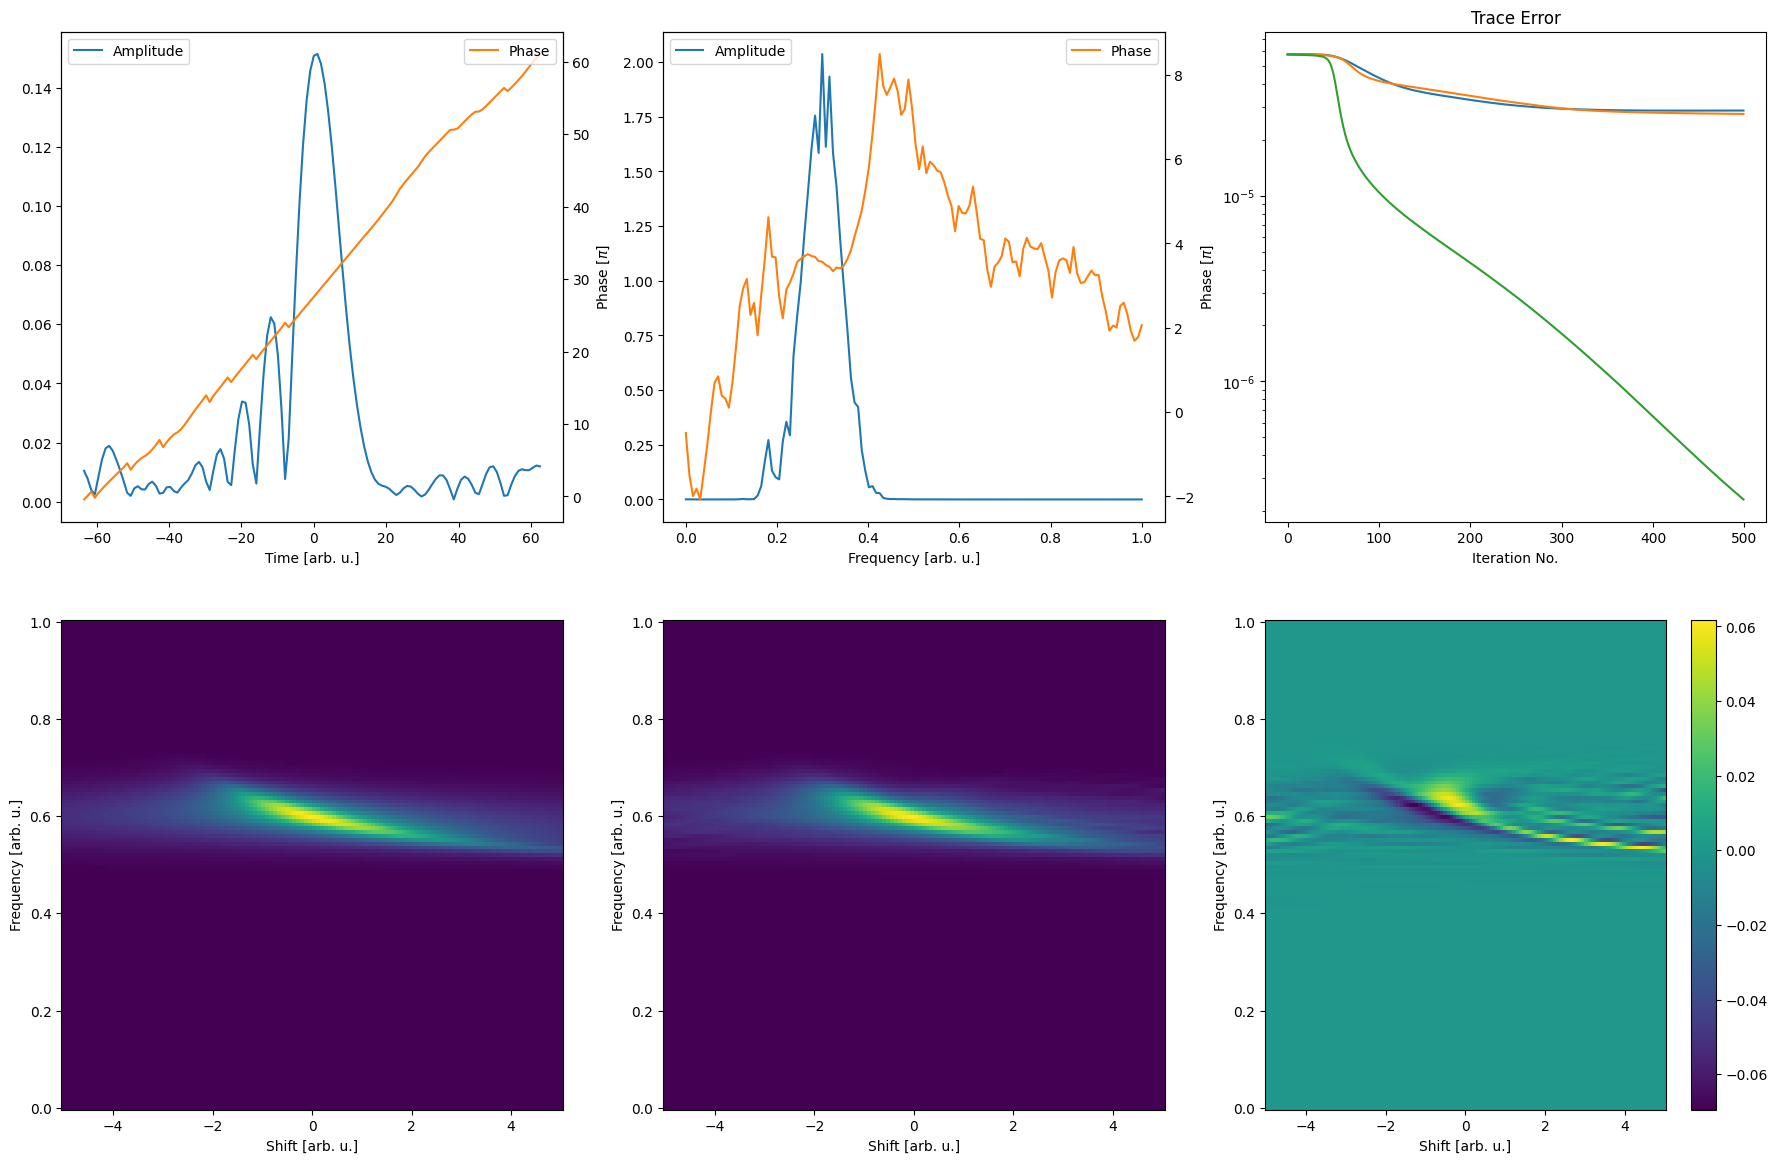

In [8]:
# basic = Basic(z_arr, frequency, trace, "shg")
# population = basic.create_initial_population(population_size=3, guess_type="random")

# final_result = basic.run(population, 100)
# basic.plot_results(final_result)





# gp = GeneralizedProjection(z_arr, frequency, trace, "shg")
# population = gp.create_initial_population(population_size=3, guess_type="random")

# # gp.global_hessian="lbfgs"#"diagonal"
# # gp.no_steps_descent=50
# # gp.gamma=1

# final_result = gp.run(population, 100)
# gp.plot_results(final_result)




tdp = TimeDomainPtychography(z_arr, frequency, trace, "shg", pie_method="rPIE")
population = tdp.create_initial_population(population_size=3, guess_type="random")

tdp.alpha=0.1
tdp.local_gamma=0.005
tdp.global_gamma=0.5

tdp.use_linesearch=False
tdp.global_hessian="diagonal"

final_result = tdp.run(population, 0, 500)
tdp.plot_results(final_result)






# copra = COPRA(z_arr, frequency, trace, "shg")
# population = copra.create_initial_population(population_size=3, guess_type="random")

# copra.local_gamma = 1
# copra.global_gamma = 0.25

# copra.local_hessian = False
# copra.global_hessian = False

# copra.adaptive_scaling = "linear"

# final_result = copra.run(population, 12, 15)
# copra.plot_results(final_result)

In [24]:
DifferentialEvolution.__mro__, GeneralizedProjection.__mro__

((general_algorithms_frog.DifferentialEvolution,
  general_algorithms_base.DifferentialEvolutionBASE,
  general_algorithms_base.GeneralOptimization,
  BaseClasses.AlgorithmsBASE,
  BaseClasses.RetrievePulsesFROG,
  BaseClasses.RetrievePulses,
  object),
 (classic_algorithms_dscan.GeneralizedProjection,
  BaseClasses.RetrievePulsesDSCAN,
  BaseClasses.RetrievePulses,
  classic_algorithms_base.GeneralizedProjectionBASE,
  BaseClasses.AlgorithmsBASE,
  object))

In [22]:
from general_algorithms_frog import DifferentialEvolution, Evosax, LSF, AutoDiff

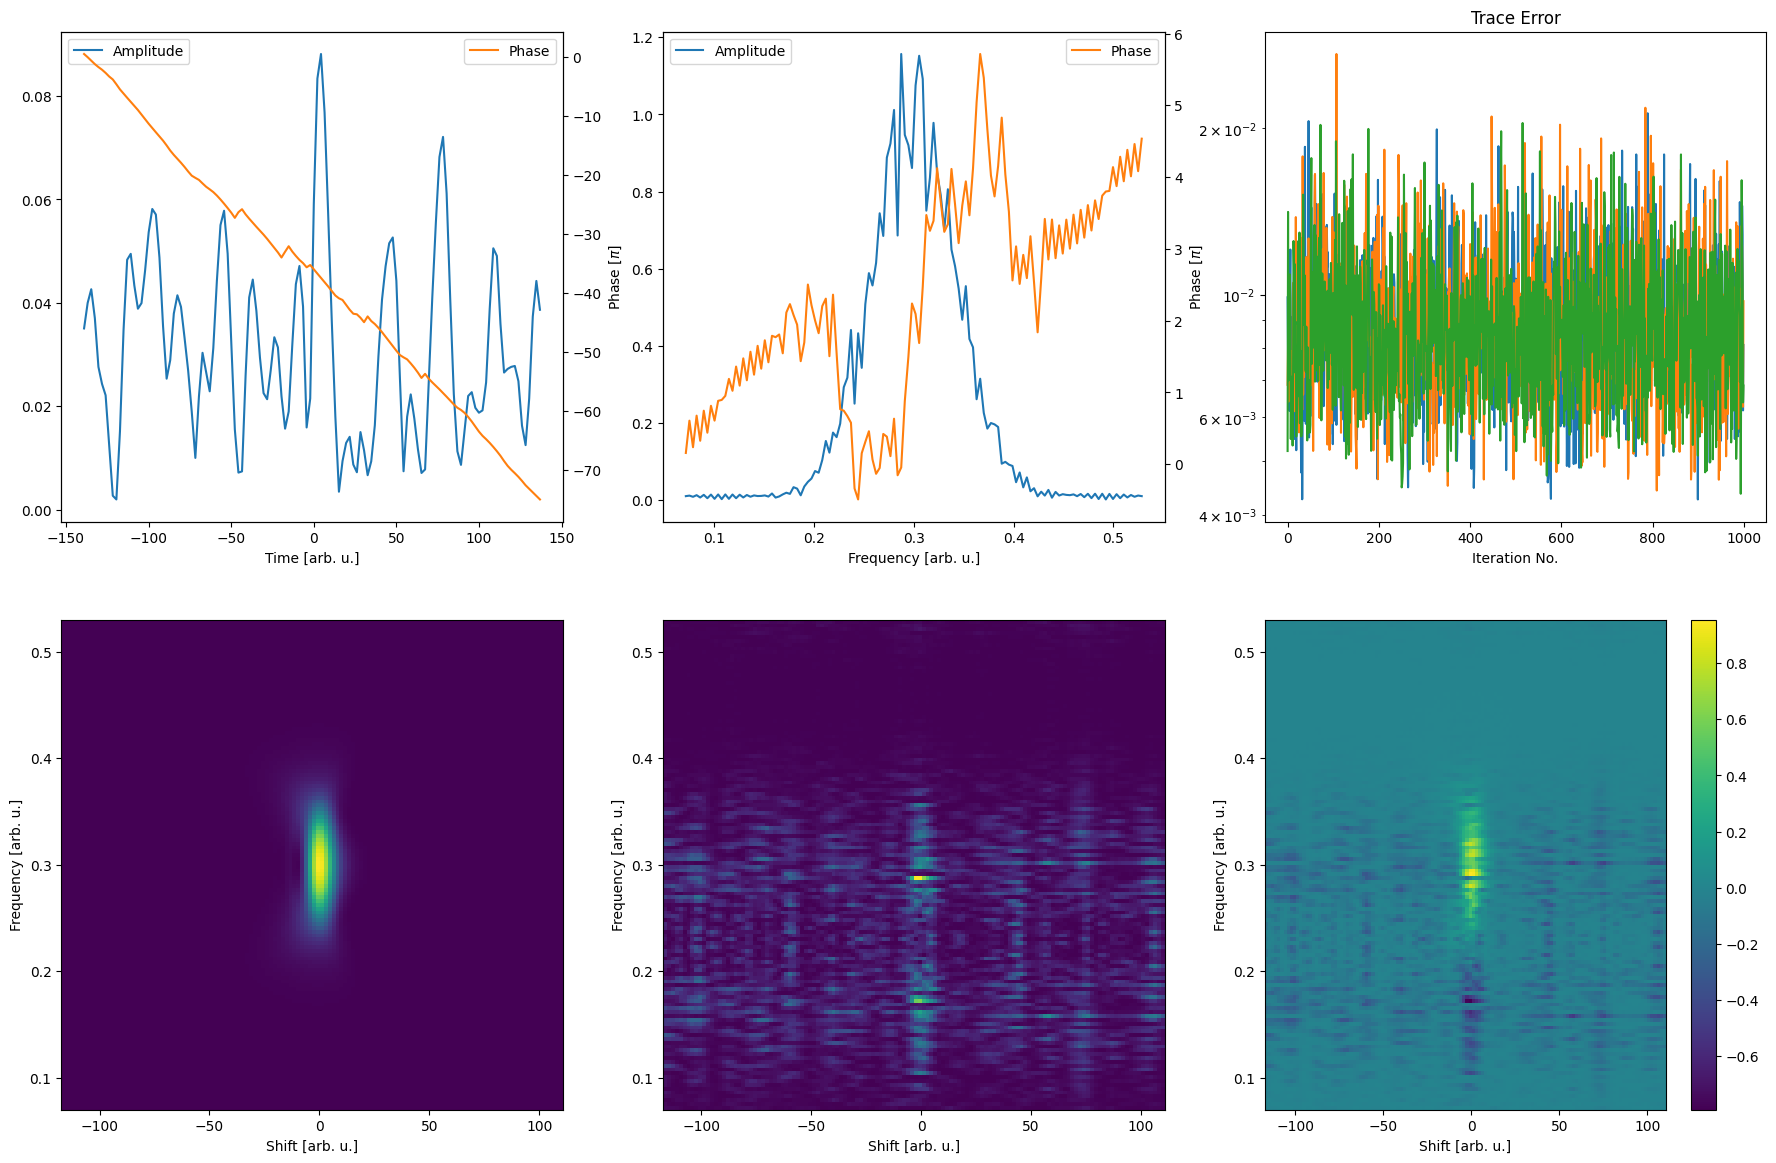

In [5]:
# de = DifferentialEvolution(time, frequency, trace, "pg", xfrog="doubleblind").use_measured_spectrum()
# spectral_amplitude = de.get_spectral_amplitude(spectra.pulse[0], spectra.pulse[1], "pulse")
# spectral_amplitude = de.get_spectral_amplitude(spectra.gate[0], spectra.gate[1], "gate")

# population = de.create_initial_population(population_size=250, amp_type="splines", phase_type="splines")

# de.strategy="best1_smooth"

# final_result = de.run(population, 150)
# de.plot_results(final_result)




# from evosax.algorithms import CMA_ES
# evo = Evosax(time, frequency, trace, "pg", xfrog="doubleblind").use_measured_spectrum()
# spectral_amplitude = evo.get_spectral_amplitude(spectra.pulse[0], spectra.pulse[1], "pulse")
# spectral_amplitude = evo.get_spectral_amplitude(spectra.gate[0], spectra.gate[1], "gate")

# population = evo.create_initial_population(population_size=250)

# evo.solver = CMA_ES

# final_result = evo.run(population, 250)
# evo.plot_results(final_result)




lsf = LSF(time, frequency, trace, "pg", xfrog=False).use_measured_spectrum(spectra.pulse[0], spectra.pulse[1], "pulse")

population = lsf.create_initial_population(population_size=3, amp_type="discrete", phase_type="discrete")

lsf.number_of_bisection_iterations=12
lsf.random_direction_mode="random"
lsf.no_points_for_continuous=5

final_result = lsf.run(population, 1000)
lsf.plot_results(final_result)





# ad = AutoDiff(time, frequency, trace, "thg", xfrog="doubleblind").use_measured_spectrum()

# spectral_amplitude = ad.get_spectral_amplitude(spectra.pulse[0], spectra.pulse[1], "pulse")
# spectral_amplitude = ad.get_spectral_amplitude(spectra.gate[0], spectra.gate[1], "gate")

# population = ad.create_initial_population(population_size=1, amp_type="discrete", phase_type="discrete")

# ad.alternating_optimization = True
# ad.solver = optax.adam(learning_rate=1e-1)

# final_result = ad.run(population, 1000)
# ad.plot_results(final_result)

In [8]:
error_arr = jnp.copy(final_result.error_arr)

In [12]:
error_arr_rand_phase = jnp.copy(final_result.error_arr)

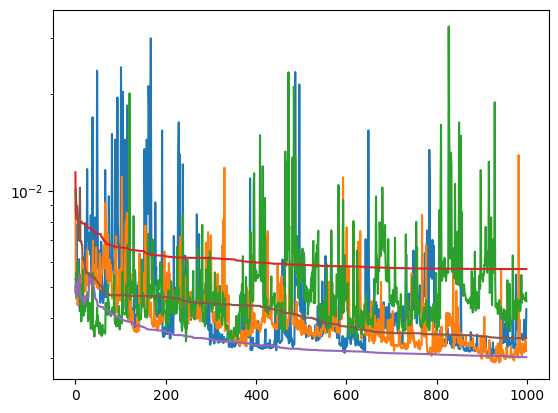

In [14]:
plt.plot(error_arr)
plt.plot(final_result.error_arr)
plt.yscale("log")

In [ ]:
from general_algorithms_dscan import DifferentialEvolution, Evosax, LSF, AutoGrad

In [ ]:
# de = DifferentialEvolution(z_arr, frequency, trace, "shg")
# population = de.create_initial_population(population_size=150)

# final_result = de.run(population, 100)
# de.plot_results(final_result)




# from evosax.algorithms import CMA_ES
# evo = Evosax(z_arr, frequency, trace, "shg")
# evo.solver = CMA_ES
# population = evo.create_initial_population(population_size=250)

# final_result = evo.run(population, 100)
# evo.plot_results(final_result)




lsf = LSF(z_arr, frequency, trace, "shg")
population = lsf.create_initial_population(population_size=3, amp_type="random", phase_type="random")

lsf.number_of_bisection_iterations=8
lsf.random_direction_mode="random"
lsf.no_points_for_continuous=15

final_result = lsf.run(population, 2000)
lsf.plot_results(final_result)





# ad = AutoGrad(z_arr, frequency, trace, "shg")
# population = ad.create_initial_population(population_size=1, amp_type="discrete", phase_type="discrete")

# ad.solver=optax.adam(learning_rate=1e-1)

# final_result = ad.run(population, 1000)
# ad.plot_results(final_result)

In [6]:
from BaseClasses import RetrievePulses2DSI
from make_pulse_and_trace import MakeTrace

In [ ]:
class MakeTrace2DSI(MakeTrace, RetrievePulses2DSI):
    def __init__(self, time, frequency, pulse_t, pulse_f, nonlinear_method, N, scale_time_range, xfrog, cut_off_val, frequency_range):
        
        self.time=time
        self.frequency=frequency
        self.pulse_t=pulse_t
        self.pulse_f=pulse_f
        self.nonlinear_method=nonlinear_method
        self.N=N
        self.scale_time_range=scale_time_range
        self.cut_off_val = cut_off_val
        self.frequency_range = frequency_range
        self.xfrog=xfrog
        self.gate = None

        self.x_arr = time



    def get_gate_pulse(self, frequency, gate_f, anc_no=1):
        gate_f = do_interpolation_1d(self.frequency, frequency, gate_f)
        gate = do_ifft(gate_f, self.sk, self.rn)

        anc = {1: "anc_1", 
               2: "anc_2"}
        setattr(self, anc[anc_no], gate)
        return gate
    
    

    def get_parameters_to_make_signal_t(self):
        measurement_info = MyNamespace(anc_1=self.anc_1, anc_2=self.anc_2, time=self.time, frequency=self.frequency, xfrog=self.xfrog, 
                                       nonlinear_method=self.nonlinear_method, doubleblind=False)
        individual = MyNamespace(pulse=self.pulse_t, gate=None)
        return individual, measurement_info, self.time
    


    def interpolate_trace(self):
        max_val=np.max(self.trace)

        idx=np.where(self.trace>max_val*self.cut_off_val)
        idx_0, idx_1 = np.sort(idx)

        idx_0_min, idx_0_max = idx_0[0], idx_0[-1]+1
        idx_1_min, idx_1_max = idx_1[0], idx_1[-1]+1


        time_zoom=self.time[idx_0_min:idx_0_max]
        frequency_zoom=self.frequency[idx_1_min:idx_1_max]

        if self.frequency_range!=None:
            fmin, fmax = self.frequency_range
        else:
            fmin, fmax = np.min(frequency_zoom), np.max(frequency_zoom)
            deltaf = fmax - fmin
            fmin = fmin - deltaf/2
            fmax = fmax + deltaf/2


        frequency_interpolate = np.linspace(fmin, fmax, self.N)
        t_central = (time_zoom[0]+time_zoom[-1])/2
        Delta_t = np.abs(time_zoom[-1]-time_zoom[0])*self.scale_time_range
        time_interpolate = np.linspace(t_central-Delta_t/2, t_central+Delta_t/2, self.N)
        

        trace_interpolate_freq = jax.vmap(do_interpolation_1d, in_axes=(None,None,0))(frequency_interpolate, self.frequency, self.trace)
        trace_interpolate = jax.vmap(do_interpolation_1d, in_axes=(None,None,1))(time_interpolate, self.time, trace_interpolate_freq)

        if self.nonlinear_method=="sd":
            frequency_interpolate = -1*frequency_interpolate
            trace_interpolate = np.flip(trace_interpolate, axis=0)
        

        frequency_pulse_spectrum, spectrum_pulse = interpolate_spectrum(self.frequency, self.pulse_f, self.N)

        anc1_f=do_fft(self.anc_1, self.sk, self.rn)
        anc2_f=do_fft(self.anc_2, self.sk, self.rn)
        frequency_gate_spectrum, spectrum_anc_1 = interpolate_spectrum(self.frequency, anc1_f, self.N)
        frequency_gate_spectrum, spectrum_anc_2 = interpolate_spectrum(self.frequency, anc2_f, self.N)

        spectra = MyNamespace(pulse=(frequency_pulse_spectrum, spectrum_pulse), 
                              anc_1=(frequency_gate_spectrum, spectrum_anc_1),
                              anc_2=(frequency_gate_spectrum, spectrum_anc_2))

        return time_interpolate, frequency_interpolate, np.abs(trace_interpolate).T, spectra
    

In [ ]:

class MakeTraceFROG(MakeTrace, RetrievePulsesFROG):
    def __init__(self, time, frequency, pulse_t, pulse_f, nonlinear_method, N, scale_time_range, xfrog, ifrog, 
                                             interpolate_fft_conform, cut_off_val, frequency_range):
        
        self.time=time
        self.frequency=frequency
        self.pulse_t=pulse_t
        self.pulse_f=pulse_f
        self.nonlinear_method=nonlinear_method
        self.N=N
        self.scale_time_range=scale_time_range
        self.interpolate_fft_conform=interpolate_fft_conform
        self.cut_off_val = cut_off_val
        self.frequency_range = frequency_range
        self.xfrog=xfrog
        self.ifrog=ifrog
        self.gate = None

        self.x_arr = time


    def get_gate_pulse(self, frequency_gate, gate_f, time, frequency):
        gate_f=do_interpolation_1d(frequency, frequency_gate, gate_f)

        self.sk, self.rn = get_sk_rn(time, frequency)
        self.gate=do_ifft(gate_f, self.sk, self.rn)
        return self.gate



    def get_parameters_to_make_signal_t(self):
        measurement_info = MyNamespace(xfrog_gate=self.gate, time=self.time, frequency=self.frequency, xfrog=self.xfrog, ifrog=self.ifrog, 
                                       nonlinear_method=self.nonlinear_method, doubleblind=False)
        individual = MyNamespace(pulse=self.pulse_t, gate=self.gate)
        return individual, measurement_info, self.time
        
    
    def interpolate_trace(self):
        max_val=np.max(self.trace)

        idx=np.where(self.trace>max_val*self.cut_off_val)
        idx_0, idx_1 = np.sort(idx)

        idx_0_min, idx_0_max = idx_0[0], idx_0[-1]+1
        idx_1_min, idx_1_max = idx_1[0], idx_1[-1]+1


        time_zoom=self.time[idx_0_min:idx_0_max]
        frequency_zoom=self.frequency[idx_1_min:idx_1_max]

        if self.frequency_range!=None:
            fmin, fmax = self.frequency_range
        else:
            fmin, fmax = np.min(frequency_zoom), np.max(frequency_zoom)
            deltaf = fmax - fmin
            fmin = fmin - deltaf/2
            fmax = fmax + deltaf/2


        frequency_interpolate = np.linspace(fmin, fmax, self.N)
        t_central = (time_zoom[0]+time_zoom[-1])/2
        Delta_t = np.abs(time_zoom[-1]-time_zoom[0])*self.scale_time_range
        time_interpolate = np.linspace(t_central-Delta_t/2, t_central+Delta_t/2, self.N)
        

        trace_interpolate_freq = jax.vmap(do_interpolation_1d, in_axes=(None,None,0))(frequency_interpolate, self.frequency, self.trace)
        trace_interpolate = jax.vmap(do_interpolation_1d, in_axes=(None,None,1))(time_interpolate, self.time, trace_interpolate_freq)

        if self.nonlinear_method=="sd":
            frequency_interpolate = -1*frequency_interpolate
            trace_interpolate = np.flip(trace_interpolate, axis=0)
        

        frequency_pulse_spectrum, spectrum_pulse = interpolate_spectrum(self.frequency, self.pulse_f, self.N)
        if self.xfrog==True:
            gate_f=do_fft(self.gate, self.sk, self.rn)
            frequency_gate_spectrum, spectrum_gate = interpolate_spectrum(self.frequency, gate_f, self.N)
        else:
            frequency_gate_spectrum, spectrum_gate = None, None
        spectra = MyNamespace(pulse=(frequency_pulse_spectrum, spectrum_pulse), 
                              gate=(frequency_gate_spectrum, spectrum_gate))

        return time_interpolate, frequency_interpolate, np.abs(trace_interpolate).T, spectra